In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from sklearn.impute import SimpleImputer
#支持中文显示
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
data = pd.read_csv(r'D:\vscode\GitHub\链家二手房.csv')

In [3]:
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x)) #Limiting floats output to 6 decimal points

In [4]:
data.head()#输出前五行，对数据有一个的框架有一个大体的认识

,链家编号,标题,小区名称,小区纬度,小区经度,邻近地铁站,所属街道,所属区域,总价,地铁线路,...,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,url,别墅类型,抵押信息
0,107102345339,内环内世纪公园满五唯一精装两房中楼层诚意出售,牡丹路186弄,31.212354,121.552919,世纪公园站,花木,浦东,450.000000,2,...,无,2020-04-05,商品房,2010-07-13,普通住宅,满五年,共有,https://sh.lianjia.com/ershoufang/107102345339...,NaN,NaN
1,107102573875,5楼，满五唯一，精装修，不靠路，诚意出售，看房约,爱法新城,31.283734,121.592517,巨峰路站,金桥,浦东,540.000000,6,...,无,2020-05-23,商品房,暂无数据,普通住宅,暂无数据,共有,https://sh.lianjia.com/ershoufang/107102573875...,NaN,NaN
2,107102253648,杨思前滩+电梯中层+税少+诚意出售+随时可看，可谈！！,三林世博家园(大道站路94弄),31.164962,121.541312,暂无信息,杨思前滩,浦东,375.000000,暂无信息,...,有,2020-03-15,商品房,2020-03-15,普通住宅,未满两年,共有,https://sh.lianjia.com/ershoufang/107102253648...,NaN,NaN
3,107102425179,此房满五唯一，南北格局通透，视野宽阔，采光充足,西谈家渡路17弄,31.241109,121.427846,暂无信息,武宁,普陀,217.000000,暂无信息,...,有,2020-04-22,商品房,2012-04-12,普通住宅,满五年,非共有,https://sh.lianjia.com/ershoufang/107102425179...,NaN,NaN
4,107102249065,徐浦大桥全景，江景房，一手动迁毛坯房，高层全明户型,华沁家园,31.143257,121.457209,暂无信息,植物园,徐汇,370.000000,暂无信息,...,有,2020-03-14,商品房,暂无数据,普通住宅,暂无数据,共有,https://sh.lianjia.com/ershoufang/107102249065...,NaN,NaN


In [5]:
data.drop_duplicates(subset=None, keep='first', inplace=False)

,链家编号,标题,小区名称,小区纬度,小区经度,邻近地铁站,所属街道,所属区域,总价,地铁线路,...,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,url,别墅类型,抵押信息
0,107102345339,内环内世纪公园满五唯一精装两房中楼层诚意出售,牡丹路186弄,31.212354,121.552919,世纪公园站,花木,浦东,450.000000,2,...,无,2020-04-05,商品房,2010-07-13,普通住宅,满五年,共有,https://sh.lianjia.com/ershoufang/107102345339...,NaN,NaN
1,107102573875,5楼，满五唯一，精装修，不靠路，诚意出售，看房约,爱法新城,31.283734,121.592517,巨峰路站,金桥,浦东,540.000000,6,...,无,2020-05-23,商品房,暂无数据,普通住宅,暂无数据,共有,https://sh.lianjia.com/ershoufang/107102573875...,NaN,NaN
2,107102253648,杨思前滩+电梯中层+税少+诚意出售+随时可看，可谈！！,三林世博家园(大道站路94弄),31.164962,121.541312,暂无信息,杨思前滩,浦东,375.000000,暂无信息,...,有,2020-03-15,商品房,2020-03-15,普通住宅,未满两年,共有,https://sh.lianjia.com/ershoufang/107102253648...,NaN,NaN
3,107102425179,此房满五唯一，南北格局通透，视野宽阔，采光充足,西谈家渡路17弄,31.241109,121.427846,暂无信息,武宁,普陀,217.000000,暂无信息,...,有,2020-04-22,商品房,2012-04-12,普通住宅,满五年,非共有,https://sh.lianjia.com/ershoufang/107102425179...,NaN,NaN
4,107102249065,徐浦大桥全景，江景房，一手动迁毛坯房，高层全明户型,华沁家园,31.143257,121.457209,暂无信息,植物园,徐汇,370.000000,暂无信息,...,有,2020-03-14,商品房,暂无数据,普通住宅,暂无数据,共有,https://sh.lianjia.com/ershoufang/107102249065...,NaN,NaN
5,107102567239,通风好，前后采光无遮挡，车水马龙寻一处安居之所~,市光三村,31.325647,121.547557,市光路站,中原,杨浦,275.000000,8,...,无,2020-05-22,商品房,2014-04-24,普通住宅,满五年,共有,https://sh.lianjia.com/ershoufang/107102567239...,NaN,NaN
6,107102479290,一梯俩户，精装修，边套全明，精品小区,虹康花苑(三期),31.215480,121.373509,北新泾站,北新泾,长宁,580.000000,2,...,无,2020-05-04,商品房,2012-07-12,普通住宅,未满两年,非共有,https://sh.lianjia.com/ershoufang/107102479290...,NaN,NaN
7,107102568604,2期房源，精装修，13平露台（已经封好）客厅带阳台,万科白马花园(公寓),31.082992,121.347044,暂无信息,莘闵别墅,松江,299.000000,暂无信息,...,无,2020-05-22,商品房,2008-05-30,普通住宅,满五年,非共有,https://sh.lianjia.com/ershoufang/107102568604...,NaN,NaN
8,107102529069,龙之梦商圈旁+精装朝南一室户+拎包入住+2楼楼层！！,商业一村,31.281579,121.482695,虹口足球场站,鲁迅公园,虹口,178.000000,3,...,无,2020-05-14,商品房,2015-08-04,普通住宅,满两年,共有,https://sh.lianjia.com/ershoufang/107102529069...,NaN,NaN
9,107102387869,动迁房，税费低；楼层高，采光好，有钥匙随时看房,新丰公寓,31.195428,121.241752,暂无信息,华新,青浦,205.000000,暂无信息,...,有,2020-04-14,动迁安置房,2012-10-17,普通住宅,满五年,非共有,https://sh.lianjia.com/ershoufang/107102387869...,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 37 columns):
链家编号     2944 non-null int64
标题       2944 non-null object
小区名称     2944 non-null object
小区纬度     2944 non-null float64
小区经度     2944 non-null float64
邻近地铁站    2944 non-null object
所属街道     2944 non-null object
所属区域     2944 non-null object
总价       2944 non-null float64
地铁线路     2944 non-null object
每平方售价    2944 non-null int64
建造时间     2944 non-null object
室数       2944 non-null int64
厅数       2944 non-null int64
厨数       2944 non-null int64
卫数       2944 non-null int64
所在楼层     2944 non-null object
楼层总数     2944 non-null int64
建筑面积     2944 non-null float64
户型结构     2936 non-null object
套内面积     2944 non-null object
建筑类型     2936 non-null object
房屋朝向     2944 non-null object
建筑结构     2944 non-null object
装修情况     2944 non-null object
梯数       2936 non-null object
户数       2936 non-null object
配备电梯     2936 non-null object
挂牌时间     2944 non-null object
交易权属     2944 non-null obj

In [7]:
data.shape

(2944, 37)

In [8]:
# 查看缺失值
def find_missing(data):
    missing_count = data.isnull().sum()
    missing_count = missing_count[missing_count > 0].sort_values(ascending=False)
    missing_rate = missing_count / len(data)
    if data.isnull().sum().any() == False:
        print("无缺失值")
    else:
        missing = pd.DataFrame()
        missing['missing_count'] = missing_count
        missing['missing_rate'] = missing_rate
        return missing

In [9]:
find_missing(data)

,missing_count,missing_rate
抵押信息,2936,0.997283
别墅类型,2936,0.997283
配备电梯,8,0.002717
户数,8,0.002717
梯数,8,0.002717
建筑类型,8,0.002717
户型结构,8,0.002717


In [10]:
#特征抵押信息以及别墅类型缺失值太多，可以删除；对于是其余特征有缺失值的记录，可以看出，如果户型是别墅，那么户数、梯数等应该没有，在缺失
#数据极少的情况下删除有缺失值的记录

In [11]:
del_index = data[data.户数.isnull()==True].index#找出别墅类型房子的八条记录

In [12]:
list(del_index)

[294, 317, 409, 746, 1245, 1787, 1970, 2291]

In [13]:
data.drop(list(del_index), inplace=True) 

In [14]:
find_missing(data)

,missing_count,missing_rate
抵押信息,2936,1.000000
别墅类型,2936,1.000000


In [15]:
data.shape

(2936, 37)

In [16]:
 data = data.drop(['抵押信息', '别墅类型'], axis=1)
#这两类特征缺失值太多，删除处理

In [17]:
find_missing(data)

无缺失值


In [18]:
data =data.reset_index(drop=True)#删除信息后重新设置索引

In [19]:
 data = data.drop(['链家编号','小区名称','url'], axis=1)
#链家编号：如果以房子总价作为预测目标，这里依据常识对特征进行初步主观的判断和分析，每个房子信息的身份证对房价不会产生影响
#小区名称：小区名称应该对房价没有什么影响，隐含的地理位置已经在爬虫数据获取阶段转换为经纬度地理信息
#url:记录爬取网页地址，对总价不产生影响

In [20]:
data.shape

(2936, 32)

In [21]:
data.columns

Index(['标题', '小区纬度', '小区经度', '邻近地铁站', '所属街道', '所属区域', '总价', '地铁线路', '每平方售价',
       '建造时间', '室数', '厅数', '厨数', '卫数', '所在楼层', '楼层总数', '建筑面积', '户型结构', '套内面积',
       '建筑类型', '房屋朝向', '建筑结构', '装修情况', '梯数', '户数', '配备电梯', '挂牌时间', '交易权属',
       '上次交易', '房屋用途', '房屋年限', '产权所属'],
      dtype='object')

In [22]:
#############################特征分析###########################

In [23]:
data['标题长度'] = data['标题'].map(len)
data = data.drop('标题', axis=1)
#标题：内容包含房屋信息和卖方的主观描述，每一条都不同，不是类别变量，也不是数字变量，无法衡量该特征对房价预测的影响，但是有可能描述的内容
#越多，越能吸引买家点击购买，特征工程，将该特征变换成标题的字符长度

In [24]:
data['标题长度'].value_counts()

25    437
24    433
23    318
22    272
26    222
21    195
20    175
19    168
27    148
18    124
17    104
16     90
28     67
15     66
14     63
29     24
13     15
30     13
31      2
Name: 标题长度, dtype: int64

In [25]:
data['小区经度'].describe()

count   2936.000000
mean     121.157578
std        5.927911
min        0.000000
25%      121.390058
50%      121.450961
75%      121.525583
max      121.923503
Name: 小区经度, dtype: float64

In [26]:
#删除经纬度为零的记录
del_l = data[data.小区经度==0].index
del_a = data[data.小区纬度==0].index
data.drop(list(del_a), inplace=True) 
data =data.reset_index(drop=True)

In [27]:
data.shape

(2929, 32)

In [28]:
data.邻近地铁站
#邻近地铁站：这部分信息有接近一半缺失，缺失的默认为无，其他默认是有邻近地铁站

0       世纪公园站
1        巨峰路站
2        暂无信息
3        暂无信息
4        暂无信息
        ...  
2924     中潭路站
2925     翔殷路站
2926    鞍山新村站
2927     暂无信息
2928      丰庄站
Name: 邻近地铁站, Length: 2929, dtype: object

In [29]:
data.邻近地铁站

0       世纪公园站
1        巨峰路站
2        暂无信息
3        暂无信息
4        暂无信息
        ...  
2924     中潭路站
2925     翔殷路站
2926    鞍山新村站
2927     暂无信息
2928      丰庄站
Name: 邻近地铁站, Length: 2929, dtype: object

In [30]:
data.所属区域.value_counts()#编码

浦东    736
闵行    403
宝山    293
徐汇    211
普陀    201
松江    170
静安    169
杨浦    165
嘉定    156
长宁    124
黄浦     91
虹口     74
青浦     72
奉贤     55
金山      9
Name: 所属区域, dtype: int64

In [31]:
data.所属街道.value_counts()

北蔡      74
莘庄      63
世博      53
上大      52
古美      50
        ..
海湾       1
金山       1
人民广场     1
佘山       1
合庆       1
Name: 所属街道, Length: 164, dtype: int64

In [32]:
data.地铁线路.value_counts()
#地铁线路：也是包含地理位置信息的，缺失值也将近一半，后面做相关性分析时酌情处理

暂无信息    1386
9        167
2        155
1        154
7        151
8        139
6        137
3        120
11       113
4        103
13        83
12        82
10        72
5         45
17        17
16         5
Name: 地铁线路, dtype: int64

In [33]:
data.每平方售价.describe()#信息完整，建筑面积×每平方售价 = 总价，每平方售价和总价线性相关，删除该特征

count     2929.000000
mean     56609.056333
std      22138.996993
min      14199.000000
25%      41005.000000
50%      53157.000000
75%      68204.000000
max     201466.000000
Name: 每平方售价, dtype: float64

In [34]:
data.建造时间.value_counts()#建造时间未知信息较少

1994    184
2005    164
1995    163
2008    136
2006    135
1996    128
未知      111
2004    111
1997    111
2007    105
2011    102
2003     98
2014     88
2012     85
1998     83
2010     82
2009     80
1999     76
2002     76
1993     73
2013     67
1990     59
2001     56
2000     52
2015     49
1989     46
1985     43
1988     42
1992     42
1986     39
1987     37
1984     35
1983     34
1991     26
1982     24
2016     20
1980     17
1981     14
1979      6
1975      4
1978      4
2018      2
1957      2
1977      2
1974      2
2017      2
1959      2
1976      2
1960      2
1965      1
1947      1
1958      1
1956      1
1940      1
1924      1
Name: 建造时间, dtype: int64

In [35]:
imp = SimpleImputer(missing_values='未知', strategy='most_frequent')

In [36]:
data['建造时间'] = imp.fit_transform(data['建造时间'].values.reshape(-1,1))

In [37]:
data.每平方售价.describe()

count     2929.000000
mean     56609.056333
std      22138.996993
min      14199.000000
25%      41005.000000
50%      53157.000000
75%      68204.000000
max     201466.000000
Name: 每平方售价, dtype: float64

In [38]:
data.建造时间[data.建造时间=='未知']#该特征信息完整

Series([], Name: 建造时间, dtype: object)

In [39]:
data['建造时间'] = data['建造时间'].astype("int")

In [40]:
data[['室数','厅数','卫数','厨数']].isnull().any()

室数    False
厅数    False
卫数    False
厨数    False
dtype: bool

In [41]:
data['室数'].value_counts()

2    1590
3     644
1     616
4      68
5       9
7       1
6       1
Name: 室数, dtype: int64

In [42]:
data['厅数'].value_counts()

1    1506
2    1289
0     124
3      10
Name: 厅数, dtype: int64

In [43]:
data['卫数'].value_counts()

1    2457
2     430
3      33
4       7
5       1
0       1
Name: 卫数, dtype: int64

In [44]:
data['厨数'].value_counts()

1    2747
0     173
2       9
Name: 厨数, dtype: int64

In [45]:
#由以上可知，室数、厅数、卫数、厨数数据完整

In [46]:
data['所在楼层'].value_counts()#数据完整，特征处理时，可用label_encoder进行分类变量编码

中楼层    1097
高楼层     996
低楼层     836
Name: 所在楼层, dtype: int64

In [47]:
data['楼层总数'].value_counts()

6     1257
18     218
14     155
11     155
5      146
7      146
17      75
24      69
12      66
16      53
15      48
13      42
8       40
9       33
21      33
20      31
26      30
10      26
4       26
28      26
27      26
25      24
29      22
32      22
33      19
31      18
34      17
30      17
23      17
22      15
19       9
37       7
38       7
35       7
36       5
39       4
3        4
53       3
99       1
40       1
44       1
56       1
60       1
61       1
41       1
43       1
45       1
59       1
2        1
Name: 楼层总数, dtype: int64

In [48]:
data['建筑面积'].describe()

count   2929.000000
mean      81.573213
std       35.584849
min       17.050000
25%       56.470000
50%       76.180000
75%       95.650000
max      353.580000
Name: 建筑面积, dtype: float64

In [49]:
data['户型结构'].value_counts()#label_encoder分类编码

平层      2833
复式        61
错层        20
暂无数据      12
跃层         3
Name: 户型结构, dtype: int64

In [50]:
imp = SimpleImputer(missing_values='暂无数据', strategy='most_frequent')
data['户型结构'] = imp.fit_transform(data['户型结构'].values.reshape(-1,1))

In [51]:
data['套内面积'].value_counts()#套内面积，缺失数据太多，这里将该特征删除

暂无数据      2722
50㎡          3
68㎡          3
80㎡          3
108㎡         3
          ... 
85.3㎡        1
42.77㎡       1
43㎡          1
72㎡          1
62.48㎡       1
Name: 套内面积, Length: 188, dtype: int64

In [52]:
data = data.drop('套内面积',axis = 1)

In [53]:
data.columns

Index(['小区纬度', '小区经度', '邻近地铁站', '所属街道', '所属区域', '总价', '地铁线路', '每平方售价', '建造时间',
       '室数', '厅数', '厨数', '卫数', '所在楼层', '楼层总数', '建筑面积', '户型结构', '建筑类型', '房屋朝向',
       '建筑结构', '装修情况', '梯数', '户数', '配备电梯', '挂牌时间', '交易权属', '上次交易', '房屋用途',
       '房屋年限', '产权所属', '标题长度'],
      dtype='object')

In [54]:
data['户型结构'].value_counts()#label_encoder

平层    2845
复式      61
错层      20
跃层       3
Name: 户型结构, dtype: int64

In [55]:
data['建筑类型'].value_counts()

板楼      2697
塔楼       203
板塔结合      21
暂无数据       8
Name: 建筑类型, dtype: int64

In [56]:
imp = SimpleImputer(missing_values='暂无数据', strategy='most_frequent')
data['建筑类型'] = imp.fit_transform(data['建筑类型'].values.reshape(-1,1))

In [57]:
data['房屋朝向'].value_counts()#房子大都朝南，南北朝向和南朝向应该是表达一个意思

南            2101
南 北           615
西南             40
东南             39
东              18
北 南            17
西              15
北              12
西北             10
南 西             9
东 南             8
东南 南            6
南 西南            5
西 北             3
东 西             3
东 北             2
东 南 北           2
东 东南            2
东北              2
南 东 北           2
南 西 北           2
南 北 东           1
暂无数据            1
东 南 西           1
西南 南            1
南 东南            1
西南 东北           1
西 北 南           1
西南 西北           1
东 东北            1
南 西北            1
西 东             1
南 西南 西北 北       1
南 东             1
东南 南 西南         1
西南 西            1
北 西北            1
Name: 房屋朝向, dtype: int64

In [58]:
#住宅朝向按照优劣顺序为正南——东南——东——西南——西——北,朝南和朝北南方向一致
#一共2733条，占比为93.33,其余记录占比较少，而且大都带有南，记录较为混乱，综合考虑删除该特征

In [59]:
print((2101+632)/data.shape[0])

0.9330829634687606


In [60]:
data['建筑结构'].value_counts()

钢混结构    1837
砖混结构    1076
混合结构       8
未知结构       5
框架结构       3
Name: 建筑结构, dtype: int64

In [61]:
data['装修情况'].value_counts()

精装    1681
简装     977
毛坯     213
其他      58
Name: 装修情况, dtype: int64

In [62]:
data['梯数'].value_counts()

一     2141
两      701
三       53
四       20
二十       3
五        3
六        2
十        2
八        1
十八       1
十七       1
十二       1
Name: 梯数, dtype: int64

In [63]:
ti_dict = {'一':1,'两':2,'三':3,'四':4,'五':5,'二十':20,'十':10,'六':6,'十七':17,'十二':12,'十八':18,'八':8}

In [64]:
for index,t in enumerate(data['梯数']):
    for key in list(ti_dict.keys()):
        if t == key:
            data.loc[index,'梯数'] = ti_dict[key]

In [65]:
data['梯数'].value_counts()

1     2141
2      701
3       53
4       20
5        3
20       3
10       2
6        2
17       1
18       1
12       1
8        1
Name: 梯数, dtype: int64

In [66]:
data['梯数'] = data['梯数'].astype("int")

In [67]:
data['户数'].value_counts()

两    1139
四     777
三     549
六     122
五     119
八     105
十      59
七      30
九      15
一       9
二       5
Name: 户数, dtype: int64

In [68]:
hu_dict = {'一':1,'两':2,'二':2,'三':3,'四':4,'五':5,'六':6,'七':7,'八':8,'九':9,'十':10}

In [69]:
hu_dict.keys()

dict_keys(['一', '两', '二', '三', '四', '五', '六', '七', '八', '九', '十'])

In [70]:
for index,t in enumerate(data['户数']):
    for key in list(hu_dict.keys()):
        if t == key:
            data.loc[index,'户数'] = hu_dict[key]

In [71]:
data['户数'].value_counts()


2     1144
4      777
3      549
6      122
5      119
8      105
10      59
7       30
9       15
1        9
Name: 户数, dtype: int64

In [72]:
data['户数'] = data['户数'].astype("int")

In [73]:
data['配备电梯'].value_counts()

无       1503
有       1392
暂无数据      34
Name: 配备电梯, dtype: int64

In [74]:
data['挂牌时间'].value_counts()#挂牌时间为房屋对外出售的时间，对当前房价没有影响，也可能挂牌时间久，
#反映该房子较难出售，进而房主会调低房价，但这是结果，不是因素，因此将该特征删除

2020-05-24    72
2020-05-23    66
2020-05-16    57
2020-05-27    55
2020-05-17    55
              ..
2018-03-07     1
2018-01-25     1
2018-06-12     1
2019-02-20     1
2019-12-12     1
Name: 挂牌时间, Length: 424, dtype: int64

In [75]:
data['交易权属'].value_counts()#label_encoder

商品房      2674
动迁安置房     233
售后公房       22
Name: 交易权属, dtype: int64

In [76]:
data['房屋用途'].value_counts()#单一类型占比较大，删除

普通住宅    2923
新式里弄       5
花园洋房       1
Name: 房屋用途, dtype: int64

In [77]:
data['房屋年限'].value_counts()#分类类型转换

满五年     1264
暂无数据     918
满两年      424
未满两年     323
Name: 房屋年限, dtype: int64

In [78]:
imp = SimpleImputer(missing_values='暂无数据', strategy='most_frequent')
data['房屋年限'] = imp.fit_transform(data['房屋年限'].values.reshape(-1,1))

In [79]:
data['产权所属'].value_counts()

共有      1572
非共有     1130
暂无数据     227
Name: 产权所属, dtype: int64

In [80]:
imp = SimpleImputer(missing_values='暂无数据', strategy='most_frequent')
data['产权所属'] = imp.fit_transform(data['产权所属'].values.reshape(-1,1))

In [81]:
data.columns

Index(['小区纬度', '小区经度', '邻近地铁站', '所属街道', '所属区域', '总价', '地铁线路', '每平方售价', '建造时间',
       '室数', '厅数', '厨数', '卫数', '所在楼层', '楼层总数', '建筑面积', '户型结构', '建筑类型', '房屋朝向',
       '建筑结构', '装修情况', '梯数', '户数', '配备电梯', '挂牌时间', '交易权属', '上次交易', '房屋用途',
       '房屋年限', '产权所属', '标题长度'],
      dtype='object')

In [82]:
#****************特征完整****************
#'小区纬度', '小区经度','每平方售价','室数', '厅数', '厨数', '卫数','建筑面积','梯数', '户数'

In [83]:
#****************特征删除****************
#删除'链家编号','小区名称','每平方售价','url','抵押信息', '别墅类型','套内面积',
#'房屋朝向','挂牌时间','房屋用途','上次交易'

In [84]:
 data = data.drop(['每平方售价','房屋朝向','挂牌时间','房屋用途','上次交易'], axis=1)

In [85]:
#********************数据探索********************

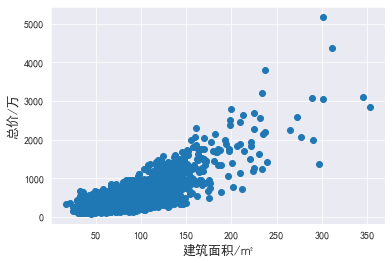

In [86]:
fig, ax = plt.subplots()
ax.scatter(x = data['建筑面积'], y = data['总价'])
plt.ylabel('总价/万', fontsize=13)
plt.xlabel('建筑面积/㎡', fontsize=13)
plt.show()
#总体来说，房屋总价和建筑面积还是呈现线性关系的，随着建筑面积的增加，房屋总价上涨

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1B1BDB50>,
      dtype=object)

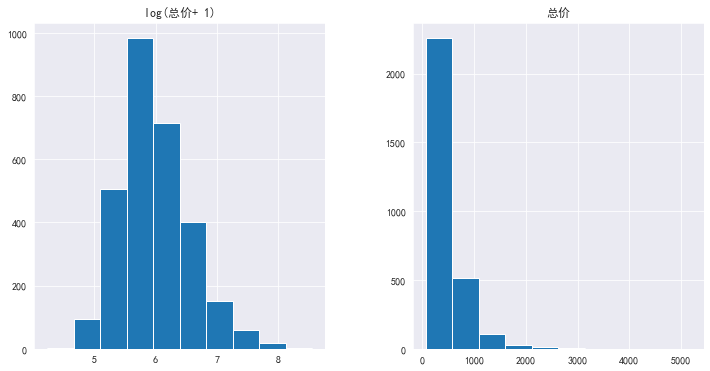

In [87]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"总价":data["总价"],"log(总价+ 1)":np.log1p(data["总价"])})
prices.hist()

In [196]:
data['总价'].max()

5180.0

In [89]:
quantitative = [feature for feature in data.columns if data.dtypes[feature] != 'object'] # 定量变量
quantitative.remove('总价')
qualitative = [feature for feature in data.columns if data.dtypes[feature] == 'object'] # 定性变量

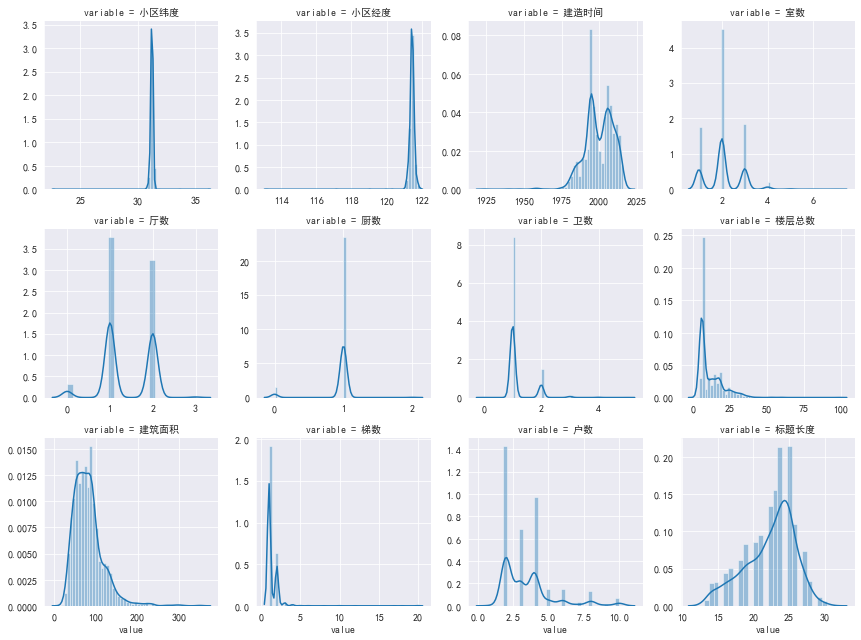

In [90]:
m_cont = pd.melt(data, value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.distplot, 'value')

d:\python\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


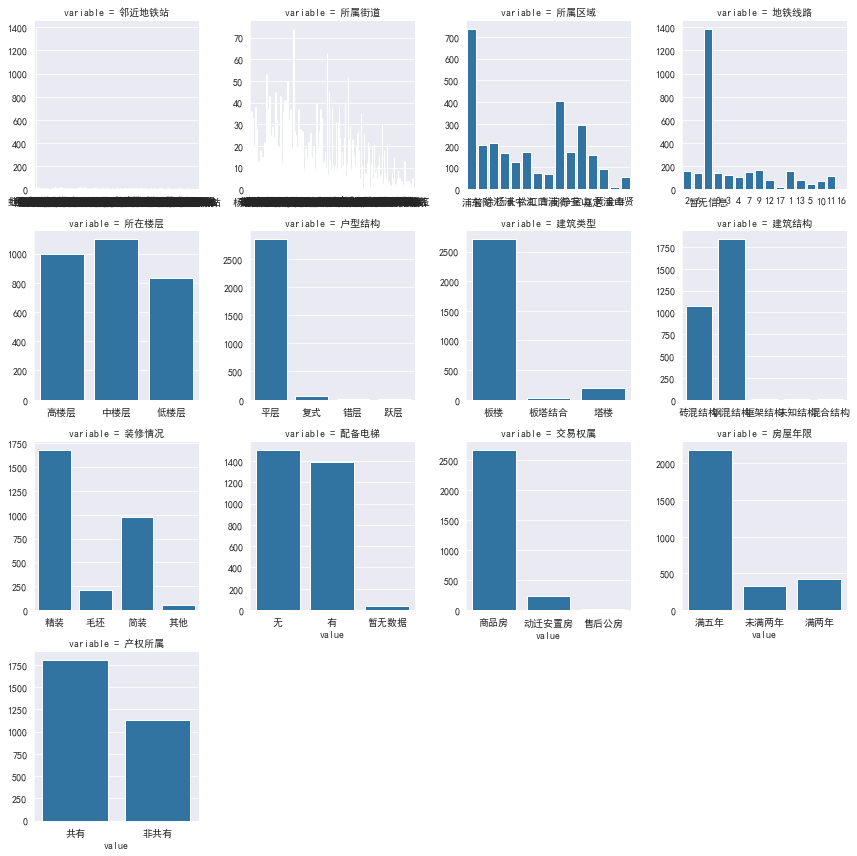

In [91]:
# 定性变量频数统计图
m_disc = pd.melt(data, value_vars=qualitative)
g = sns.FacetGrid(m_disc, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.countplot, 'value')


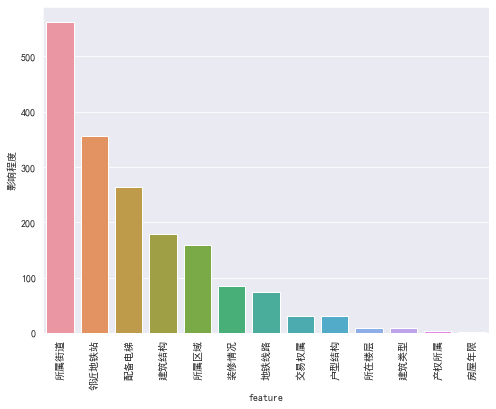

In [92]:
#单因素ANOVA也就是单因素方差分析，是用来研究一个控制变量的不同水平是否对观测变量产生了显著影响。通俗地讲就是分析变量x的变化对变量y
#的影响的显著性，所以一般变量之间存在某种影响关系的，验证一种变量的变化对另一种变量的影响显著性的检验。
def anova(frame, qualitative):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    p_vals = []
    for fea in qualitative:
        samples = []
        cls = frame[fea].unique() # 变量的类别值
        for c in cls:
            c_array = frame[frame[fea]==c]['总价'].values
            samples.append(c_array)
        p_val = stats.f_oneway(*samples)[1] # 获得p值,p值越小，对SalePrice的显著性影响越大
        p_vals.append(p_val)
    anv['pval'] = p_vals
    return anv.sort_values('pval')
a = anova(data, qualitative)
a['影响程度'] = np.log(1./a['pval'].values) # 对SalePrice的影响悬殊度
plt.figure(figsize=(8, 6))
sns.barplot(x='feature', y='影响程度', data=a)
plt.xticks(rotation=90)
plt.show()

In [93]:
data_encoded = data.copy()

In [94]:
#对定性特征按照房价平均值进行排序编码
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()#找出该特征的所有分类赋予索引
    ordering.index = ordering['val']
    ordering['spmean'] = frame[[feature, '总价']].groupby(feature)['总价'].mean()#计算该特征每一种分类的房价平均值
    ordering = ordering.sort_values('spmean')#房价平均值由低到高排序
    ordering['ordering'] = np.arange(1, ordering.shape[0]+1)#用排序的结果代替房价平均值的高低
    ordering = ordering['ordering'].to_dict() # 返回的数据样例{category1:1, category2:2, ...}

    # 对frame[feature]编码，新增一列编码后的特征，并将分类编码值填充到对应的位置
    for category, code_value in ordering.items():
        frame.loc[frame[feature]==category, feature+'_E'] = code_value
qual_encoded = []
for qual in qualitative:
    encode(data_encoded, qual)
    qual_encoded.append(qual+'_E')
print(qual_encoded)

['邻近地铁站_E', '所属街道_E', '所属区域_E', '地铁线路_E', '所在楼层_E', '户型结构_E', '建筑类型_E', '建筑结构_E', '装修情况_E', '配备电梯_E', '交易权属_E', '房屋年限_E', '产权所属_E']


d:\python\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


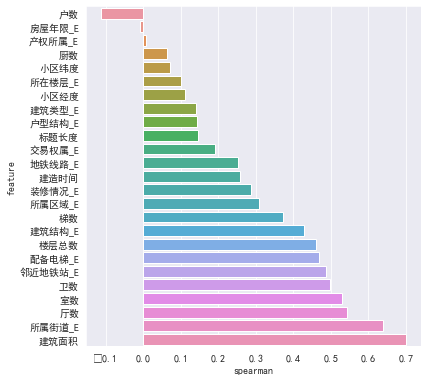

In [95]:
# 计算特征变量与房价的spearman相关系数
def spearman(frame, features):
    spr =  pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['总价'],'spearman') for f in features]
    spr = spr.sort_values('spearman')

    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(x='spearman', y='feature', data=spr)
spearman(data_encoded, quantitative+qual_encoded)

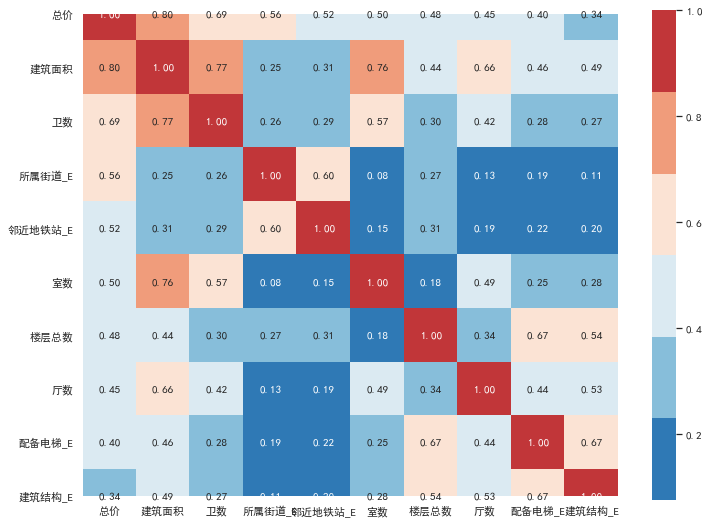

In [201]:
# 分析变量之间的相关性
plt.figure(1, figsize=(12,9))
corr = data_encoded[['总价']+quantitative+qual_encoded].corr()
k = 10 #热度图显示的特征数量
cols = corr.nlargest(k, '总价')['总价'].index
cm = np.corrcoef(data_encoded[cols].values.T)
sns.set(font_scale=1)
# plt.rcParams['font.family'] = 'AR PL UKai CN'
cmap=sns.color_palette('RdBu_r') 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols.values, xticklabels=cols.values,cmap=cmap)
#设置参数，可以显示中文
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [97]:
#*********************特征工程*******************

In [98]:
#****************特征编码**************
#'邻进地铁站'(暂无信息，其他有明确的站点)————————————定义映射函数
#'地铁线路'(暂无信息，其他有明确的线路)——————————————定义映射函数
#'所在楼层'(分为低中高三类)—————————————————————————定义映射函数
#'户型结构'(平层\复式\错层\跃层)————————————————————OneHotEncoder
#'建筑类型'(板楼\塔楼\板塔结合)————————————————————OneHotEncoder
#'建筑结构'(钢混结构\砖混结构\混合结构\框架结构)—————OneHotEncoder
#'装修情况'(精装\简装\毛坯\其他)————————————————————定义映射函数
#'配备电梯'(有\无)—————————————————————————————————label_encoder
#'交易权属'(商品房\动迁安置房\售后公房)—————————————OneHotEncoder
#'房屋年限'(满五年\满两年\未满两年 )————————————————定义映射函数
#'产权所属'(共有\非共有)———————————————————————————label_encoder
#'所属街道'(共有164个街道)—————————————————————————label_encoder
#'梯数'和'户数'需要将汉语数字变成阿拉伯数字

In [99]:
#******************特征创造*******************
#'标题'变成'标题长度'————————————————————————————————已完成


In [134]:
newdata = data.copy()

In [135]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 26 columns):
小区纬度     2929 non-null float64
小区经度     2929 non-null float64
邻近地铁站    2929 non-null object
所属街道     2929 non-null object
所属区域     2929 non-null object
总价       2929 non-null float64
地铁线路     2929 non-null object
建造时间     2929 non-null int32
室数       2929 non-null int64
厅数       2929 non-null int64
厨数       2929 non-null int64
卫数       2929 non-null int64
所在楼层     2929 non-null object
楼层总数     2929 non-null int64
建筑面积     2929 non-null float64
户型结构     2929 non-null object
建筑类型     2929 non-null object
建筑结构     2929 non-null object
装修情况     2929 non-null object
梯数       2929 non-null int32
户数       2929 non-null int32
配备电梯     2929 non-null object
交易权属     2929 non-null object
房屋年限     2929 non-null object
产权所属     2929 non-null object
标题长度     2929 non-null int64
dtypes: float64(4), int32(3), int64(6), object(13)
memory usage: 412.0+ KB


In [136]:
loc_feature = ['地铁线路','邻近地铁站']
for feature in loc_feature:
    for index,value in enumerate(newdata[feature]):
        if value == '暂无信息':
            newdata.loc[index,feature] = 0
        else:
            newdata.loc[index,feature] = 1

In [137]:
newdata['地铁线路']

0       1
1       1
2       0
3       0
4       0
       ..
2924    1
2925    1
2926    1
2927    0
2928    1
Name: 地铁线路, Length: 2929, dtype: int64

In [138]:
#定义映射函数
def map_values(df):
    df['所在楼层'] = df['所在楼层'].map({'低楼层':1
                                       ,'中楼层':2
                                       ,'高楼层':3
                                      })

    df['装修情况'] = df['装修情况'].map({'其他':1
                                        ,'毛坯':2
                                        ,'简装':3
                                        ,'精装':4
                                       })

    df['房屋年限'] = df['房屋年限'].map({'未满两年':1
                                        ,'满两年':2
                                        ,'满五年':3
                                        })

In [139]:
map_values(newdata)

In [140]:
newdata['所在楼层'].value_counts()

2    1097
3     996
1     836
Name: 所在楼层, dtype: int64

In [141]:
from sklearn.preprocessing import OneHotEncoder

In [142]:
columns_OneHotEncoder = ['户型结构','建筑类型','建筑结构','交易权属']
for feature in columns_OneHotEncoder:
    X = newdata[feature].values.reshape(-1,1)
    enc = OneHotEncoder(categories='auto').fit(X)
    result = enc.transform(X).toarray()
    columns = [str(feature)+str(i) for i in range(result.shape[1])]
    result = pd.DataFrame(result,columns =columns )
    newdata = pd.concat([newdata,result],axis=1)
    newdata=newdata.drop([feature],axis=1)

In [143]:
newdata.columns

Index(['小区纬度', '小区经度', '邻近地铁站', '所属街道', '所属区域', '总价', '地铁线路', '建造时间', '室数',
       '厅数', '厨数', '卫数', '所在楼层', '楼层总数', '建筑面积', '装修情况', '梯数', '户数', '配备电梯',
       '房屋年限', '产权所属', '标题长度', '户型结构0', '户型结构1', '户型结构2', '户型结构3', '建筑类型0',
       '建筑类型1', '建筑类型2', '建筑结构0', '建筑结构1', '建筑结构2', '建筑结构3', '建筑结构4', '交易权属0',
       '交易权属1', '交易权属2'],
      dtype='object')

In [144]:
from sklearn.preprocessing import LabelEncoder
columns_LabelEncoder=['产权所属','配备电梯','所属区域','所属街道']
for feature in columns_LabelEncoder:
    newdata[feature] = LabelEncoder().fit_transform(newdata[feature].values.reshape(-1,1).ravel())

In [145]:
newdata['产权所属'].value_counts()

0    1799
1    1130
Name: 产权所属, dtype: int64

In [146]:
list(newdata.columns)

['小区纬度',
 '小区经度',
 '邻近地铁站',
 '所属街道',
 '所属区域',
 '总价',
 '地铁线路',
 '建造时间',
 '室数',
 '厅数',
 '厨数',
 '卫数',
 '所在楼层',
 '楼层总数',
 '建筑面积',
 '装修情况',
 '梯数',
 '户数',
 '配备电梯',
 '房屋年限',
 '产权所属',
 '标题长度',
 '户型结构0',
 '户型结构1',
 '户型结构2',
 '户型结构3',
 '建筑类型0',
 '建筑类型1',
 '建筑类型2',
 '建筑结构0',
 '建筑结构1',
 '建筑结构2',
 '建筑结构3',
 '建筑结构4',
 '交易权属0',
 '交易权属1',
 '交易权属2']

In [147]:
newdata.head()

,小区纬度,小区经度,邻近地铁站,所属街道,所属区域,总价,地铁线路,建造时间,室数,厅数,...,建筑类型1,建筑类型2,建筑结构0,建筑结构1,建筑结构2,建筑结构3,建筑结构4,交易权属0,交易权属1,交易权属2
0,31.212354,121.552919,1,125,7,450.000000,1,1995,2,1,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
1,31.283734,121.592517,1,141,7,540.000000,1,2002,2,2,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
2,31.164962,121.541312,0,89,7,375.000000,0,2006,2,1,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
3,31.241109,121.427846,0,98,4,217.000000,0,1990,2,1,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,31.143257,121.457209,0,97,3,370.000000,0,2012,1,1,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


In [152]:
x=newdata.drop("总价",axis=1)
y=newdata["总价"]
r_s=300

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.30, random_state=r_s)

In [154]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [174]:
regressors=[ 
           DecisionTreeRegressor()
           ,LinearRegression()
           ,KNeighborsRegressor()
           ,RandomForestRegressor(random_state=r_s)
          ]

scores_val=[]
MAE=[]

for regressor in regressors:
    scores_val.append(regressor.fit(X_train,y_train).score(X_val,y_val))
    y_pred=regressor.predict(X_val)
    MAE.append(mean_absolute_error(y_val,y_pred))

    
results=zip(scores_val,MAE)
results=set(results) 

In [175]:
results

{(0.5827318536462814, 124.02538161404269),
 (0.712687263848648, 117.18215017064847),
 (0.7221056243912933, 105.80296928327645),
 (0.8177975563938965, 72.58625483503982)}

In [176]:
results_score_val=[item[0] for item in results]
results_MAE=[item[1] for item in results]



df_results=pd.DataFrame({"Algorithms":regressors
                         ,"Validation Score":results_score_val
                         ,"MAE":results_MAE
                        })
df_results

,Algorithms,Validation Score,MAE
0,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.712687,117.182150
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.817798,72.586255
2,"KNeighborsRegressor(algorithm='auto', leaf_siz...",0.582732,124.025382
3,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.722106,105.802969


In [177]:
best_models=df_results.sort_values(by="MAE")

In [186]:
best_model=best_models.iloc[0][0]

In [187]:
best_models

,Algorithms,Validation Score,MAE
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.817798,72.586255
3,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.722106,105.802969
0,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.712687,117.182150
2,"KNeighborsRegressor(algorithm='auto', leaf_siz...",0.582732,124.025382


In [188]:
best_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

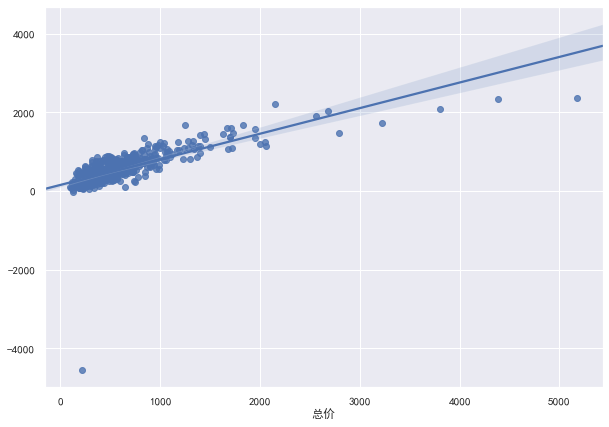

In [189]:
plt.figure(figsize=(10,7))
y_pred=best_model.predict(X_val)
sns.regplot(x=y_val,y=y_pred,truncate=False)
plt.show()